In [ ]:
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
processed_data_path = "data.csv"
df = pd.read_csv(processed_data_path)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Drop specific columns

In [ ]:
columns_to_drop = ['id', 'diagnosis','Unnamed: 32']
df = df.drop(columns=columns_to_drop)

In [ ]:
df = pd.DataFrame(df, columns=df.columns)

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

Fit and transform the data

In [ ]:
print(type(df))  # Should output: <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [ ]:
scaler = StandardScaler()

standardized_data = scaler.fit_transform(df)
df= pd.DataFrame(standardized_data, columns=df.columns)

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

<ipython-input-135-544e518d03d2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-135-544e518d03d2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-135-544e518d03d2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

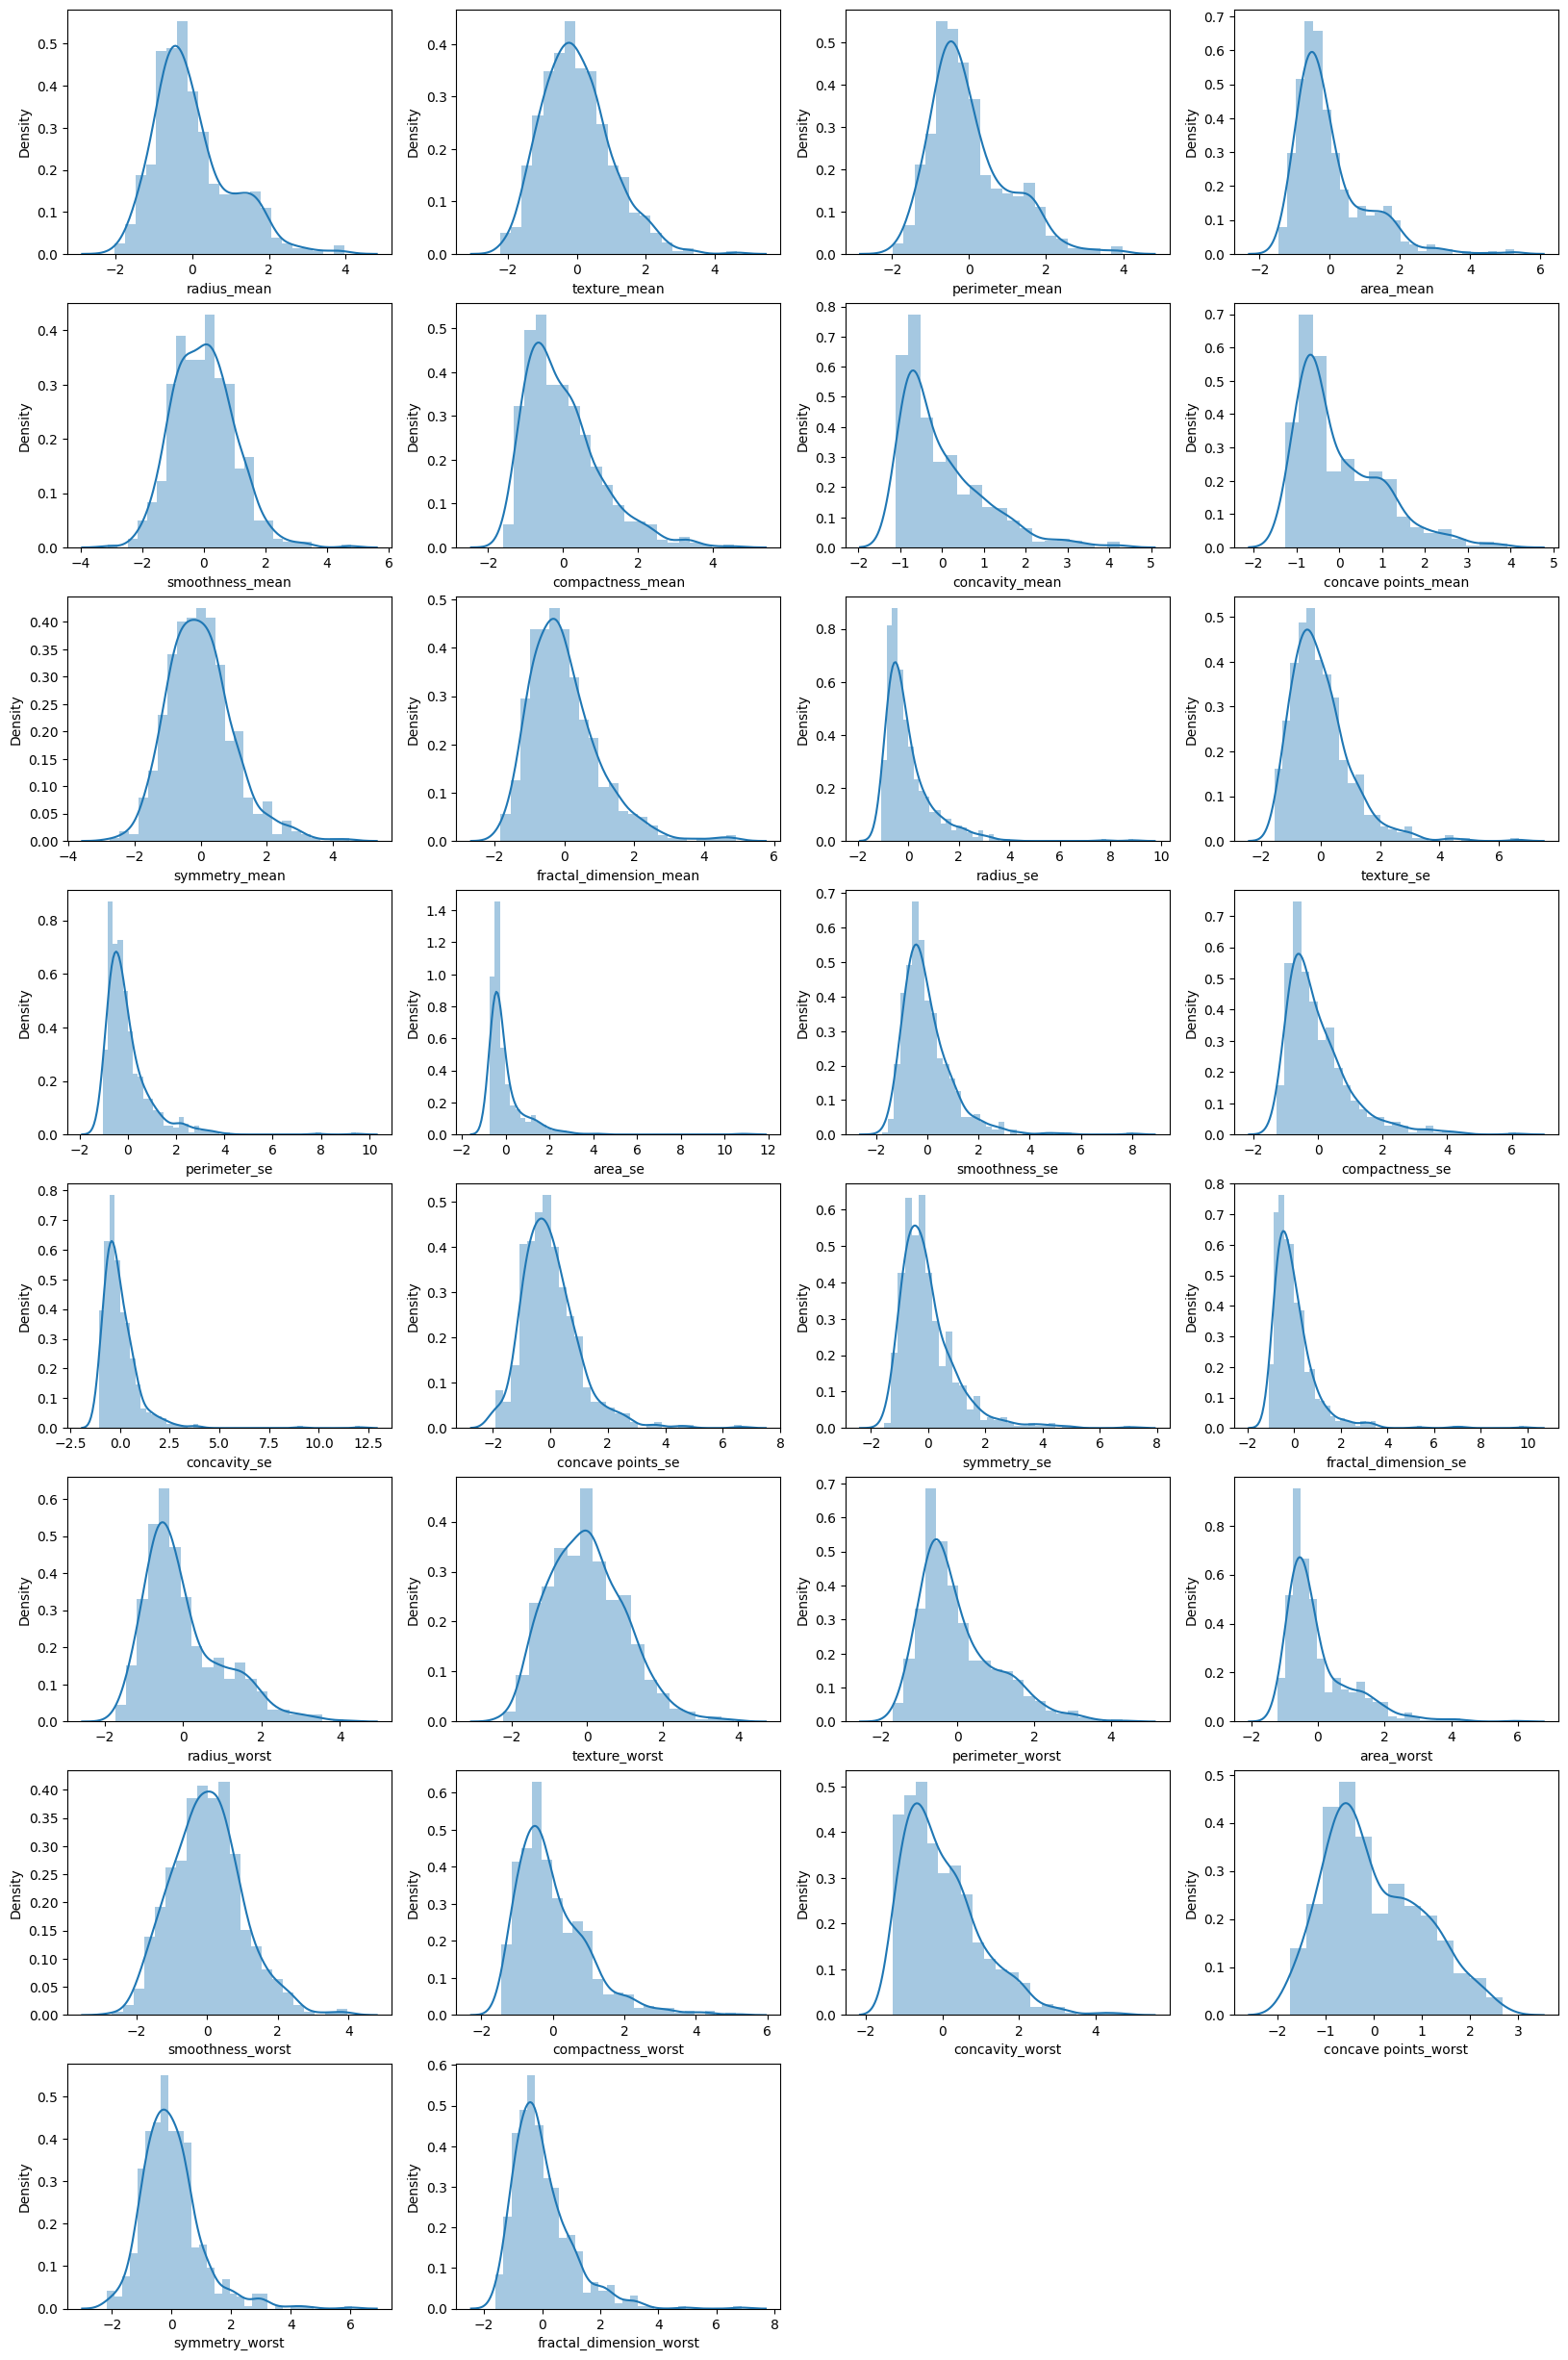

In [ ]:
#Density plots
plt.figure(figsize=(20, 35))
col = 1
for i in df.columns:
    plt.subplot(9, 4, col)
    sns.distplot(df[i])
    col += 1

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

In [ ]:
def compute_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]  # Extract points in cluster i
        if len(cluster_points) > 0:
            centroids[i] = cluster_points.mean(axis=0)  # Compute mean of the points
    return centroids


In [ ]:
def k_means(X, k, max_iters=100, tolerance=1e-4):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Random initialization

    for _ in range(max_iters):
        # Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = compute_centroids(X, labels, k)

        # Check for convergence using tolerance
        if np.all(np.linalg.norm(centroids - new_centroids, axis=1) < tolerance):
            break

        centroids = new_centroids

    return labels, centroids

Apply custom KMeans (let's assume k=3)

In [ ]:
k = 3
labels, centroids = k_means(df.values, k)

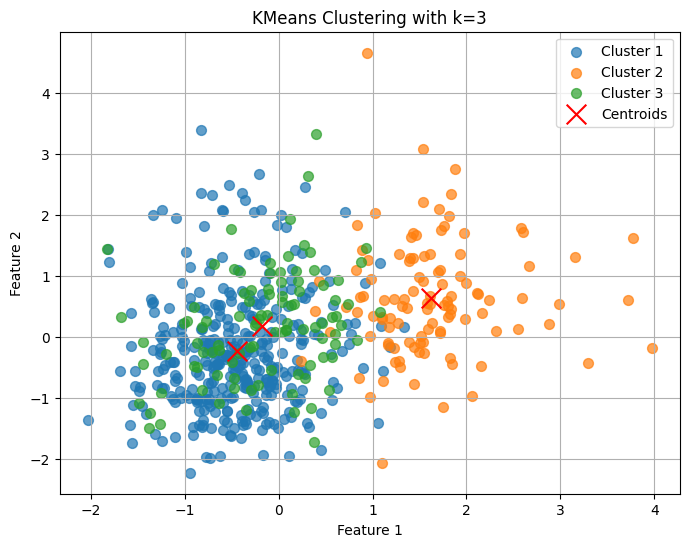

In [ ]:
plt.figure(figsize=(8, 6))

# Loop over each cluster to plot them separately
for cluster_id in np.unique(labels):
    # Select points that belong to the current cluster
    cluster_points = df.iloc[labels == cluster_id]

    # Plot these points using a unique color for each cluster
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1],
                label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)  # Adjust alpha for transparency

# Plot centroids as red 'x' markers
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")

plt.title(f"KMeans Clustering with k={k}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Compute SSE for k = 1 to 10


In [ ]:
def elbow_method(X, max_k=10):
    sse = []  # Sum of squared errors (SSE)
    for k in range(1, max_k + 1):
        labels, centroids = k_means(X, k)

        # Calculate distances between each point and its corresponding centroid
        distances = np.linalg.norm(X - centroids[labels], axis=1) ** 2

        # Sum of squared errors (SSE) for this value of k
        sse_value = np.sum(distances)
        sse.append(sse_value)

        # Print SSE for each k
        print(f"SSE for k={k}: {sse_value}")

    return sse

Find the optimal k using the elbow method

In [ ]:
def find_optimal_k(sse):
    diffs = np.diff(sse)

    # Look for the largest drop in SSE between consecutive k values
    optimal_k = np.argmin(diffs) + 2  # Adding 2 to account for the shift in indices

    return optimal_k


In [ ]:
sse = elbow_method(df.values, max_k=10)

SSE for k=1: 17070.0
SSE for k=2: 11595.526607115786
SSE for k=3: 10065.441178732828
SSE for k=4: 9334.842277652795
SSE for k=5: 8653.714362482915
SSE for k=6: 8288.148215656012
SSE for k=7: 7542.668643207386
SSE for k=8: 7354.917838860946
SSE for k=9: 6986.816230912733
SSE for k=10: 6816.56574467646


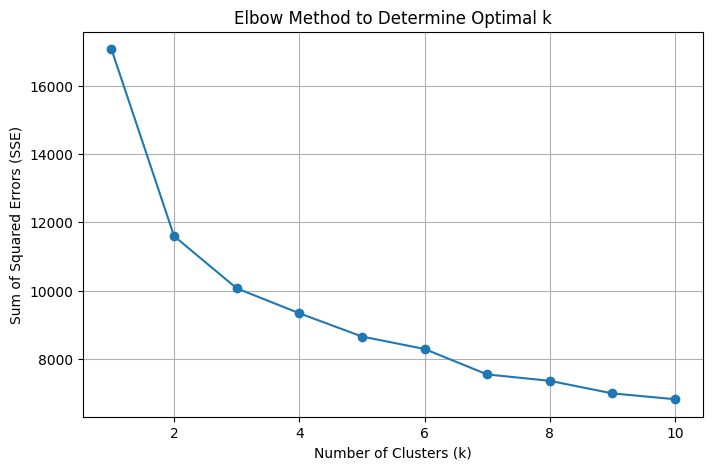

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = find_optimal_k(sse)
print(f"The optimal number of clusters (k) is: {optimal_k}")

The optimal number of clusters (k) is: 2


In [ ]:
# Apply K-Means with the optimal_k
labels, centroids = k_means(df.values, optimal_k)


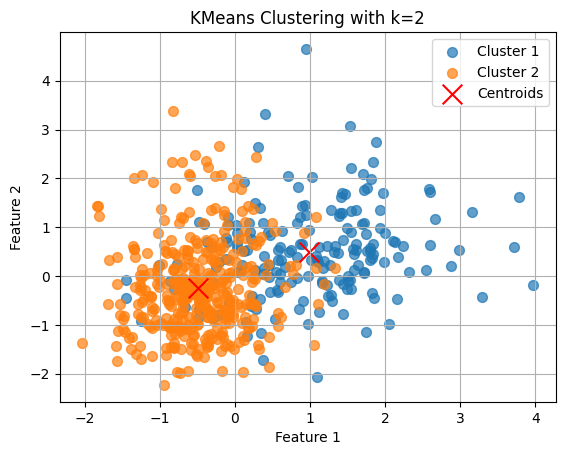

In [ ]:
# Loop over each cluster to plot them separately
for cluster_id in np.unique(labels):
    # Select points that belong to the current cluster
    cluster_points = df.iloc[labels == cluster_id]

    # Plot these points using a unique color for each cluster
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1],
                label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)  # Adjust alpha for transparency

# Plot centroids as red 'x' markers
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")

plt.title(f"KMeans Clustering with k={optimal_k}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Standardize the data
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

In [ ]:
#Compute the covariance matrix
def compute_covariance_matrix(data):
    return np.cov(data, rowvar=False)

In [ ]:
#Calculate eigenvalues and eigenvectors
def compute_eigenvalues_and_vectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

In [ ]:
#Sort eigenvalues and eigenvectors
def sort_eigenvalues_and_vectors(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    return eigenvalues, eigenvectors

In [ ]:
#Project data onto top k eigenvectors
def project_data(data, eigenvectors, k):
    top_eigenvectors = eigenvectors[:, :k]  # Select top k eigenvectors
    reduced_data = np.dot(data, top_eigenvectors)
    return reduced_data

In [ ]:
def pca(data, num_components):
    standardized_data = standardize_data(data)
    cov_matrix = compute_covariance_matrix(standardized_data)
    eigenvalues, eigenvectors = compute_eigenvalues_and_vectors(cov_matrix)
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues_and_vectors(eigenvalues, eigenvectors)
    reduced_data = project_data(standardized_data, sorted_eigenvectors, num_components)
    return reduced_data, sorted_eigenvalues, sorted_eigenvectors

In [ ]:
# Calculate explained variance ratio from eigenvalues
def calculate_explained_variance_ratio(eigenvalues):
    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = eigenvalues / total_variance
    return explained_variance_ratio


In [ ]:
# Determine the optimal number of components based on explained variance threshold
def determine_optimal_components(explained_variance_ratio, threshold=0.90):
    cumulative_variance = np.cumsum(explained_variance_ratio)
    num_components = np.argmax(cumulative_variance >= threshold) + 1
    return num_components, cumulative_variance

In [ ]:
#Perform PCA to compute eigenvalues and eigenvectors
reduced_data, eigenvalues, eigenvectors = pca(df.values, num_components=df.shape[1])  # Use all components initially

In [ ]:
#Calculate explained variance ratio
explained_variance_ratio = calculate_explained_variance_ratio(eigenvalues)

In [ ]:
#Determine the optimal number of components based on explained variance threshold
optimal_components, cumulative_variance = determine_optimal_components(explained_variance_ratio, threshold=0.90)

In [ ]:
print(f"Optimal number of components to retain 90% variance: {optimal_components}")


Optimal number of components to retain 90% variance: 7


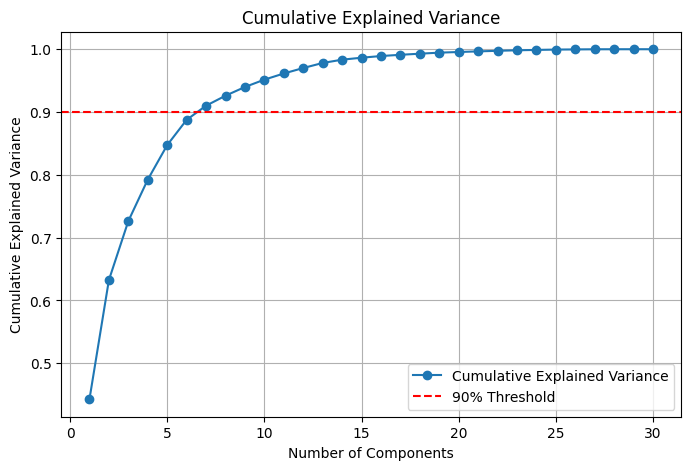

In [ ]:
# Visualize cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Perform PCA with the optimal number of components
pca_data_optimal, _, _ = pca(df.values, optimal_components)

In [ ]:
# Create a DataFrame for the reduced data
pca_df_optimal = pd.DataFrame(pca_data_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])

In [ ]:
# Print the reduced data and variance explained
print(f"PCA Reduced Data with {optimal_components} components (first 5 rows):\n{pca_df_optimal.head()}")
print(f"Explained Variance Ratios for the top {optimal_components} components:\n{explained_variance_ratio[:optimal_components]}")


PCA Reduced Data with 7 components (first 5 rows):
        PC1        PC2       PC3       PC4       PC5       PC6       PC7
0  9.192837   1.948583 -1.123166  3.633731  1.195110  1.411424 -2.159370
1  2.387802  -3.768172 -0.529293  1.118264 -0.621775  0.028656 -0.013358
2  5.733896  -1.075174 -0.551748  0.912083  0.177086  0.541452  0.668166
3  7.122953  10.275589 -3.232790  0.152547  2.960878  3.053422 -1.429911
4  3.935302  -1.948072  1.389767  2.940639 -0.546747 -1.226495  0.936213
Explained Variance Ratios for the top 7 components:
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]


In [ ]:
#Perform K-means clustering and apply the elbow method
wcss = []
k_values = range(1, 11)  # Test k from 1 to 10


In [ ]:
for k in k_values:
    labels, centroids = k_means(pca_data_optimal, k)

    # Calculate WCSS (Within-Cluster Sum of Squares)
    distances = np.linalg.norm(pca_data_optimal - centroids[labels], axis=1) ** 2
    wcss_value = np.sum(distances)

    # Append WCSS value for the current k
    wcss.append(wcss_value)


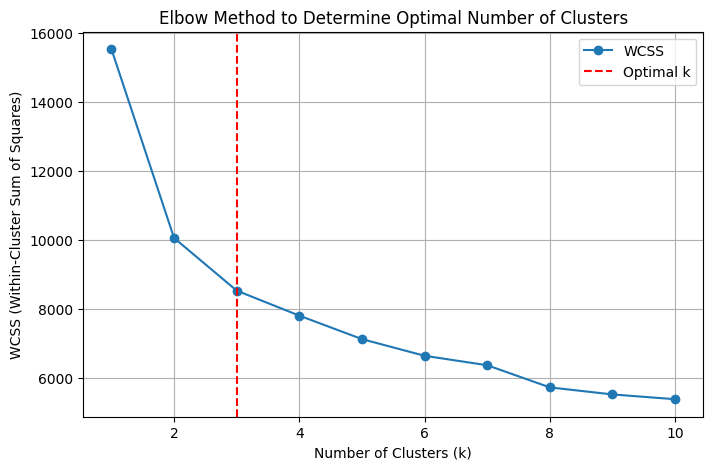

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', label='WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.axvline(x=3, color='r', linestyle='--', label='Optimal k')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(f"The best value of k (optimal number of clusters) is: {optimal_k}")

The best value of k (optimal number of clusters) is: 2


SSE for k=1: 10795.615546121197
SSE for k=2: 5332.555574203134
SSE for k=3: 3871.1480559385127
SSE for k=4: 3133.9580985467096
SSE for k=5: 2710.7608568065452
SSE for k=6: 2233.83612567591
SSE for k=7: 1874.4525869886934
SSE for k=8: 1718.7743304331475
SSE for k=9: 1601.90423452604
SSE for k=10: 1474.8255706325863


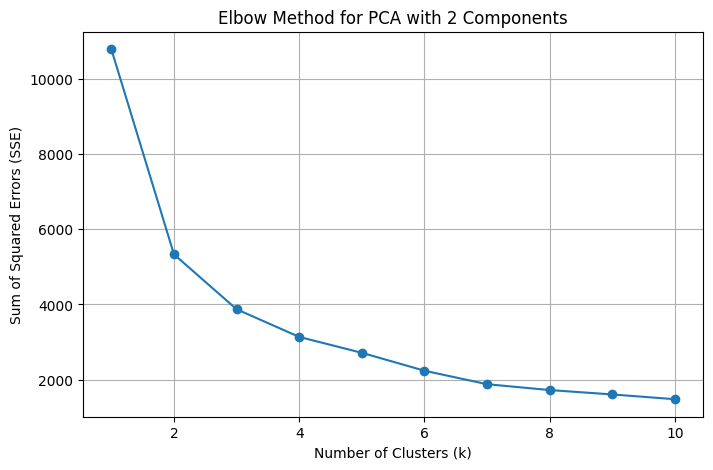

SSE for k=1: 12399.028514164733
SSE for k=2: 6928.438976935466
SSE for k=3: 5423.578073275868
SSE for k=4: 4797.308138038174
SSE for k=5: 4057.3324763519504
SSE for k=6: 3796.429046433582
SSE for k=7: 3231.828790287512
SSE for k=8: 3098.1470913483076
SSE for k=9: 2808.2983897413233
SSE for k=10: 2729.7134870970485


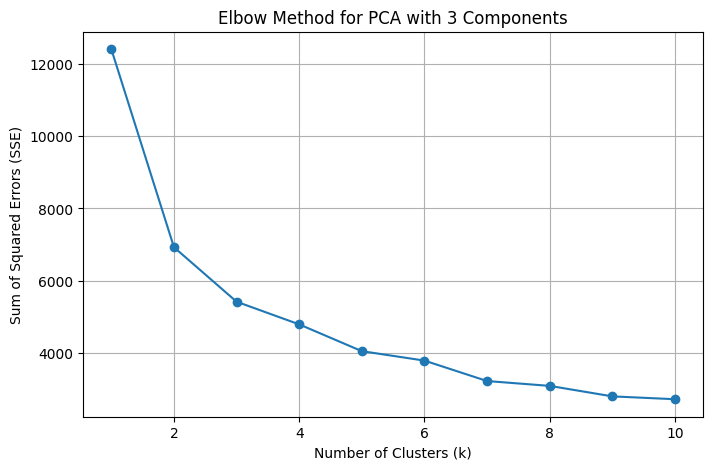

SSE for k=1: 14464.140625878996
SSE for k=2: 8992.130462630232
SSE for k=3: 7466.80713141558
SSE for k=4: 6800.469117459998
SSE for k=5: 6038.086820308059
SSE for k=6: 5631.729364109795
SSE for k=7: 5166.332727748242
SSE for k=8: 4725.052564242866
SSE for k=9: 4561.449763711233
SSE for k=10: 4411.244186718215


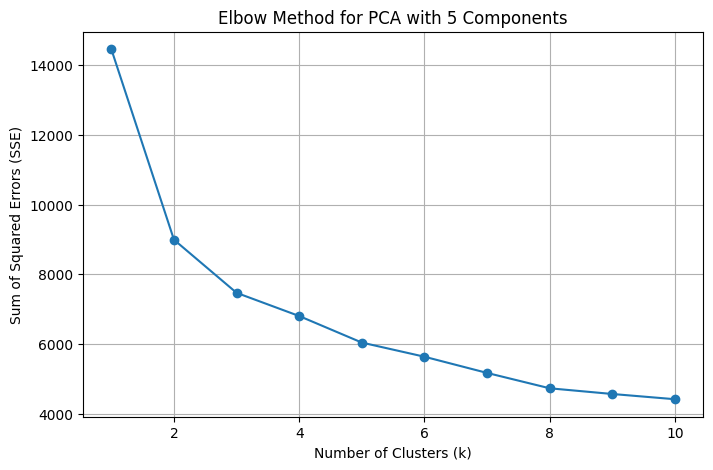

SSE for k=1: 15535.326782893197
SSE for k=2: 10063.09705349024
SSE for k=3: 8537.8950228312
SSE for k=4: 7744.576638942013
SSE for k=5: 7140.953380743098
SSE for k=6: 6653.088791754898
SSE for k=7: 6135.236044265098
SSE for k=8: 5797.7881099346705
SSE for k=9: 5677.37222654787
SSE for k=10: 5327.249007787444


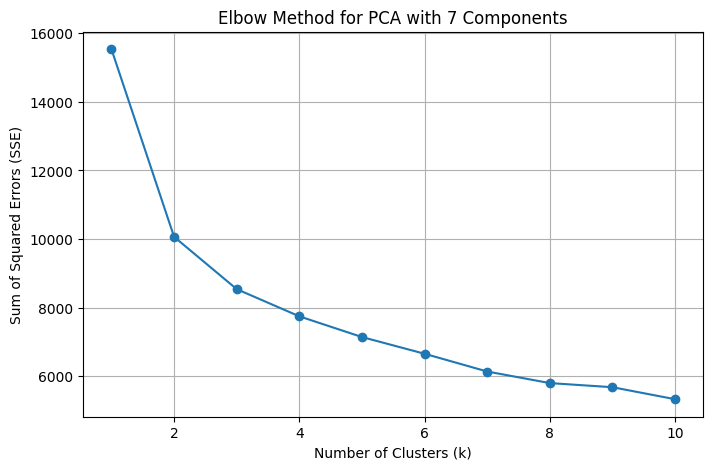

In [ ]:
# Apply Elbow Method to PCA-reduced data
def elbow_method_pca(X, max_k=10, k_values=[2, 3, 5, 7]):
    for k in k_values:
        # Apply PCA with k components
        reduced_data, _, _ = pca(X, num_components=k)

        # Apply the elbow method on PCA-reduced data
        sse = elbow_method(reduced_data, max_k=max_k)

        # Plot the SSE for each number of clusters (k)
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_k+1), sse, marker='o')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Sum of Squared Errors (SSE)')
        plt.title(f'Elbow Method for PCA with {k} Components')
        plt.grid(True)
        plt.show()

# Apply the elbow method on PCA-reduced data
elbow_method_pca(df.values, max_k=10, k_values=[2, 3, 5, 7])


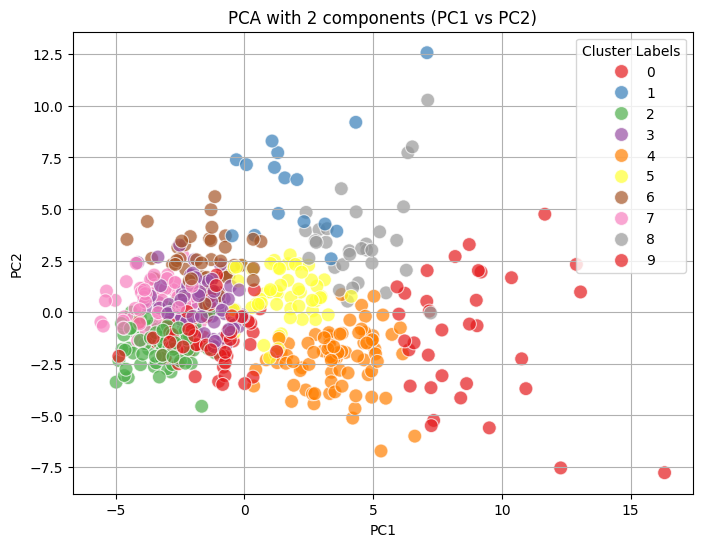

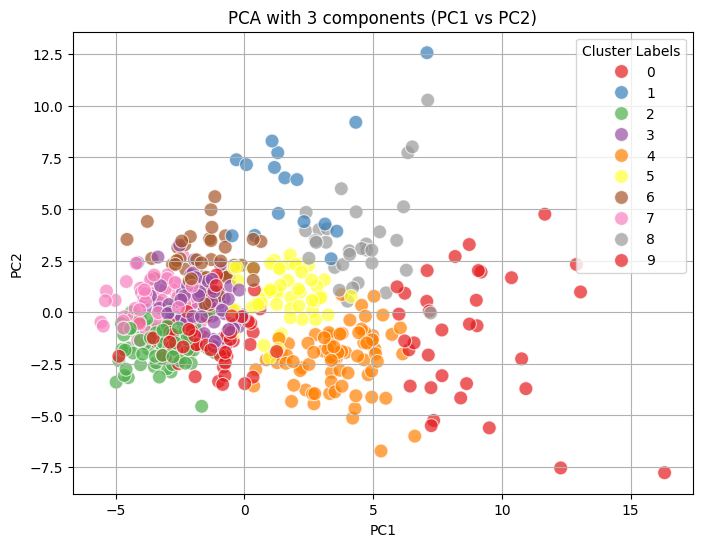

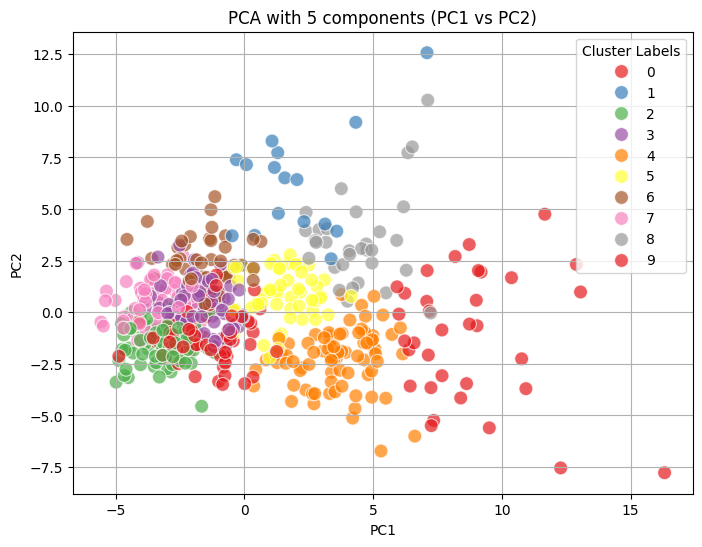

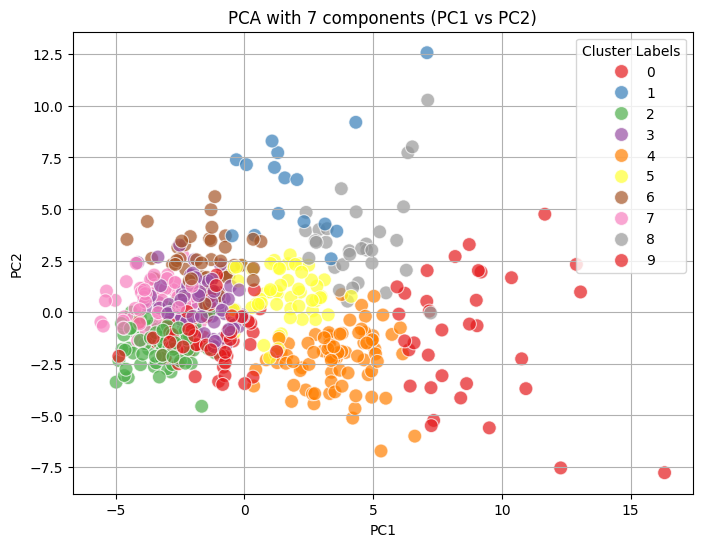

In [ ]:
# Experiment with different numbers of principal components (e.g., 2, 3, 5)
def plot_pca_with_k_components(df, labels, k_values=[2, 3, 5, 7]):
    for k in k_values:
        # Apply PCA to reduce the data to 'k' components
        reduced_data, _, _ = pca(df, num_components=k)

        # Create a DataFrame for the reduced data
        pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(k)])

        # Visualize the first two components if k >= 2
        plt.figure(figsize=(8, 6))
        if k >= 2:
            # Plot first two principal components
            sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=labels, palette='Set1', s=100, alpha=0.7)
            plt.title(f'PCA with {k} components (PC1 vs PC2)')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
        else:
            # For k == 1, only plot PC1
            sns.scatterplot(x=pca_df['PC1'], y=np.zeros_like(pca_df['PC1']), hue=labels, palette='Set1', s=100, alpha=0.7)
            plt.title(f'PCA with {k} components (PC1)')
            plt.xlabel('PC1')

        plt.legend(title="Cluster Labels")
        plt.grid(True)
        plt.show()

# Example usage (labels from K-Means, no `diagnosis` column used)
plot_pca_with_k_components(df, labels, k_values=[2, 3, 5, 7])


In [ ]:
# Function to compute SSE
def compute_sse(X, labels, centroids):
    distances = np.linalg.norm(X - centroids[labels], axis=1) ** 2
    return np.sum(distances)

# Compare SSE for both experiments
def compare_sse(df, pca_data, optimal_k):
    # Experiment 1: Clustering on original data
    labels_original, centroids_original = k_means(df.values, optimal_k)
    sse_original = compute_sse(df.values, labels_original, centroids_original)

    # Experiment 2: Clustering on PCA-reduced data
    labels_pca, centroids_pca = k_means(pca_data, optimal_k)
    sse_pca = compute_sse(pca_data, labels_pca, centroids_pca)

    print(f"SSE (Original Data): {sse_original:.2f}")
    print(f"SSE (PCA-Reduced Data): {sse_pca:.2f}")

    return sse_original, sse_pca

# Compare SSE for the two experiments
sse_original, sse_pca = compare_sse(df, pca_data_optimal, optimal_k)


SSE (Original Data): 11595.53
SSE (PCA-Reduced Data): 10063.10


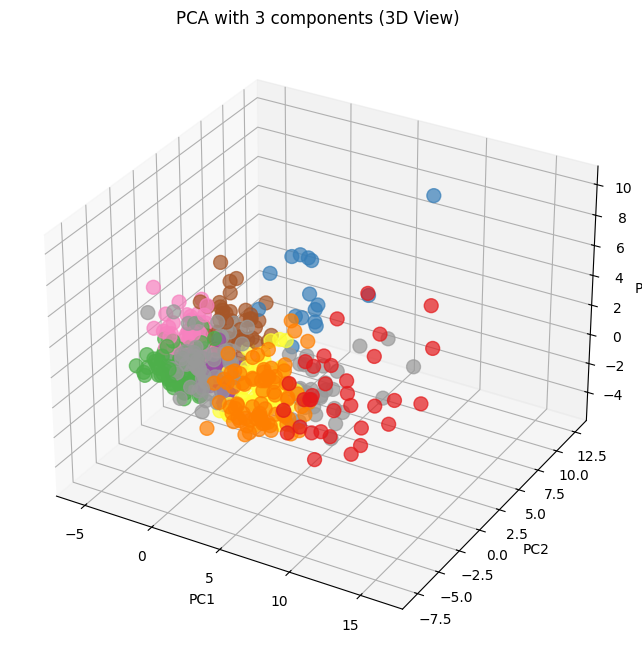

In [ ]:
def plot_3d_pca(df, labels, k=3):
    # Apply PCA with 3 components
    reduced_data, _, _ = pca(df, num_components=k)

    # Create 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot the 3D data points
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
               c=labels, cmap='Set1', s=100, alpha=0.7)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'PCA with {k} components (3D View)')

    plt.show()

# Call this function for k = 3
plot_3d_pca(df, labels, k=3)
